# 0. Group-by / Stack/ Pivot

In [1]:
import pandas as pd
import numpy as np
import re

Суть операции Group By вам уже известна (Источник: Data Analysis in Python, Wes McKinney):

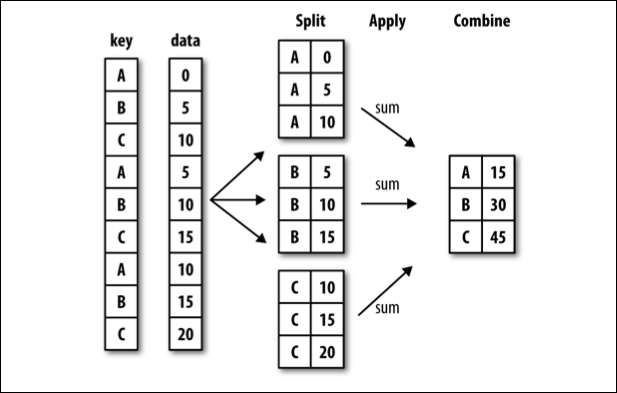

In [2]:
from IPython.display import Image
from IPython.core.display import HTML 
Image('groupby.jpg')

Важность этой операции трудно переоценить, когда речь идет о работе с транзакционными даннными, логами итд.

In [3]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets.shape

(1035, 6)

In [4]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [5]:
planets.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


In [6]:
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


In [7]:
planets.groupby('method')

In [8]:
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

Вы можете использовать итератор объекта DataFrameGroupBy:

In [9]:
for (method, group) in planets.groupby('method'):
    print("{0:30s} shape={1}".format(method, group.shape))

Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


** Stack/unstack **

Unstack - переводит иерархический индекс в "широкий" формат, удобный для анализа данных.

In [10]:
planets.groupby('method')['year'].describe().unstack()

       method                       
count  Astrometry                          2.000000
       Eclipse Timing Variations           9.000000
       Imaging                            38.000000
       Microlensing                       23.000000
       Orbital Brightness Modulation       3.000000
       Pulsar Timing                       5.000000
       Pulsation Timing Variations         1.000000
       Radial Velocity                   553.000000
       Transit                           397.000000
       Transit Timing Variations           4.000000
mean   Astrometry                       2011.500000
       Eclipse Timing Variations        2010.000000
       Imaging                          2009.131579
       Microlensing                     2009.782609
       Orbital Brightness Modulation    2011.666667
       Pulsar Timing                    1998.400000
       Pulsation Timing Variations      2007.000000
       Radial Velocity                  2007.518987
       Transit             

Хороший набор данных для практики работы с groupby и unstack - https://sdsj.ru/ , очень познавательный пример (с тем же датасетом) - https://alexanderdyakonov.wordpress.com/2016/10/14/data-science-contest-%D1%81%D0%B1%D0%B5%D1%80%D0%B1%D0%B0%D0%BD%D0%BA%D0%B0/ .

Как вы помните, можем спокойно использовать группировку по нескольким столбцам.

In [11]:
planets.dropna().groupby(['method', 'year'])['mass'].describe().unstack()

count                                                    ...   \
year             1989 1995 1996 1997 1998  1999  2000  2001  2002  2003  ...    
method                                                                   ...    
Radial Velocity   1.0  1.0  4.0  1.0  5.0  14.0  14.0  11.0  31.0  22.0  ...    
Transit           NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN   NaN  ...    

                  max                                                         
year             2005 2006  2007  2008  2009  2010   2011  2012   2013  2014  
method                                                                        
Radial Velocity  14.0  7.6  19.4  25.0  15.5  13.0  13.65  11.1  20.60  2.58  
Transit           NaN  NaN   NaN   NaN   NaN   NaN    NaN   NaN   1.47   NaN  

[2 rows x 168 columns]

Stack - операция, обратная unstack - вместо перевода в "широкий", колоночный формат - мы переводим данные в "узкий" формат:

In [12]:
planets.dropna().groupby(['method', 'year'])['mass'].describe().unstack().stack().index

MultiIndex(levels=[[u'Radial Velocity', u'Transit'], [1989, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 19]],
           names=[u'method', u'year'])

Проще всего это понять графически (источник - http://nikgrozev.com/2015/07/01/reshaping-in-pandas-pivot-pivot-table-stack-and-unstack-explained-with-pictures/):

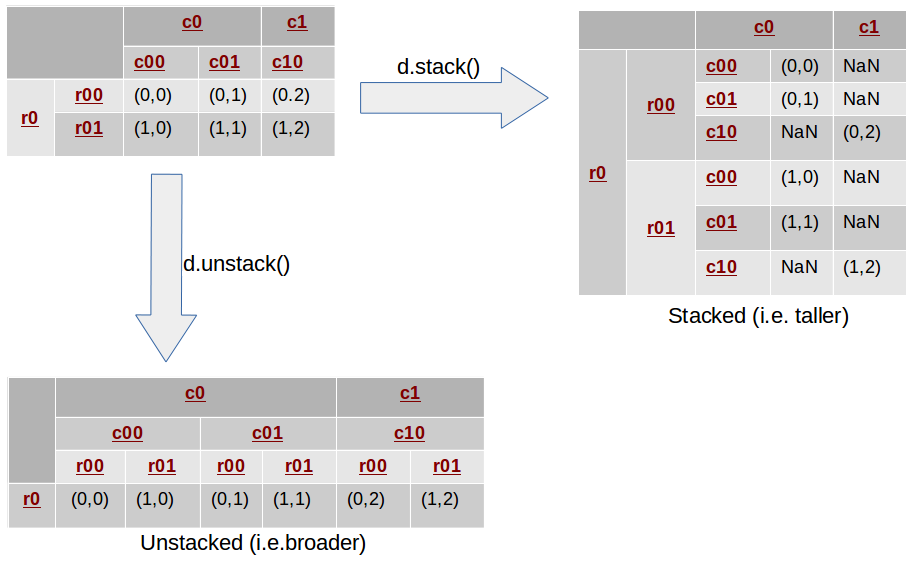

In [14]:
Image('stack-unstack1.png')

In [15]:
row_idx_arr = list(zip(['r0', 'r0'], ['r-00', 'r-01']))
row_idx = pd.MultiIndex.from_tuples(row_idx_arr)

In [16]:
row_idx

MultiIndex(levels=[[u'r0'], [u'r-00', u'r-01']],
           labels=[[0, 0], [0, 1]])

In [17]:
col_idx_arr = list(zip(['c0', 'c0', 'c1'], ['c-00', 'c-01', 'c-10']))
col_idx = pd.MultiIndex.from_tuples(col_idx_arr)

In [18]:
col_idx

MultiIndex(levels=[[u'c0', u'c1'], [u'c-00', u'c-01', u'c-10']],
           labels=[[0, 0, 1], [0, 1, 2]])

In [19]:
d = pd.DataFrame(np.arange(6).reshape(2,3), index=row_idx, columns=col_idx)
d = d.applymap(lambda x: (x // 3, x % 3))

In [20]:
d

c0              c1
           c-00    c-01    c-10
r0 r-00  (0, 0)  (0, 1)  (0, 2)
   r-01  (1, 0)  (1, 1)  (1, 2)

In [21]:
s = d.stack()
s

c0      c1
r0 r-00 c-00  (0, 0)     NaN
        c-01  (0, 1)     NaN
        c-10     NaN  (0, 2)
   r-01 c-00  (1, 0)     NaN
        c-01  (1, 1)     NaN
        c-10     NaN  (1, 2)

In [22]:
u = d.unstack()
u

c0                              c1        
      c-00            c-01            c-10        
      r-00    r-01    r-00    r-01    r-00    r-01
r0  (0, 0)  (1, 0)  (0, 1)  (1, 1)  (0, 2)  (1, 2)

Одно из очень удобных свойств group_by - в него можно предать отображение "новый индекс - старый индекс" и построить новую групппировку "на лету":

In [23]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': np.random.randint(0, 10, 6)},
                   columns = ['key', 'data1', 'data2'])

In [24]:
df

,key,data1,data2
0,A,0,3
1,B,1,4
2,C,2,6
3,A,3,2
4,B,4,4
5,C,5,6


In [25]:
df2 = df.set_index('key')
mapping = {'A': 'vowel', 'B': 'consonant', 'C': 'consonant'}
df2.groupby(mapping).sum()

,data1,data2
consonant,12,20
vowel,3,5


Ну и вообще - "общий" шаблон в анализе данных - вы считаете дескриптивные статистики по ключам:

In [26]:
df.groupby('key').aggregate(['min', np.median, max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     2    2.5   3
B       1    2.5   4     4    4.0   4
C       2    3.5   5     6    6.0   6

И передаете их в алгоритм обучения в виде матрицы:

In [27]:
df.groupby('key').aggregate(['min', np.median, max]).values

array([[0. , 1.5, 3. , 2. , 2.5, 3. ],
       [1. , 2.5, 4. , 4. , 4. , 4. ],
       [2. , 3.5, 5. , 6. , 6. , 6. ]])

Также бывает очень полезно создать новую переменную и произвести аггрегацию по ней:

In [28]:
decade = 10 * (planets['year'] // 10)
decade = decade.astype(str) + 's'
decade.name = 'decade'
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


** pivot ** в такой постановке - всего лишь более частный случай stack/unstack. Мне лично больше нравится второй (ответ на вопрос "почему" содержится выше). Тем не менее, это значит, что какой-либо из методов лучше/хуже.

In [29]:
titanic = sns.load_dataset('titanic')

In [30]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Например, мы ищем ответ на вопрос: "Какова доля выживших среди пассажиров 1 класса?"

In [31]:
titanic.groupby('class')['survived'].aggregate('mean')

class
First     0.629630
Second    0.472826
Third     0.242363
Name: survived, dtype: float64

Тут не нужен ни pivot, ни stack/unstack. Но стоит усложнить вопрос: "Какова доля выживших среди пассажиров 1 класса в разрезе пола?"

In [32]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [33]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


Для совсем изощеренных вопросов не обойтись без бинаризации определенных стоблцов. Для этого есть удобная функция cut - http://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html .

In [34]:
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [35]:
titanic.groupby(['sex', age, 'class'])['survived'].aggregate('mean').unstack()

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

Можем опять обратиться к наглядной визуализации пивота по одному столбцу (источник - http://nikgrozev.com/2015/07/01/reshaping-in-pandas-pivot-pivot-table-stack-and-unstack-explained-with-pictures/):

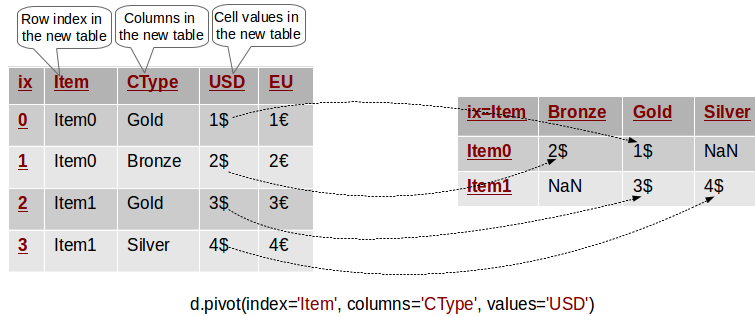

In [36]:
Image('pivoting_simple1.png')

И пивота по нескольким столбцам:

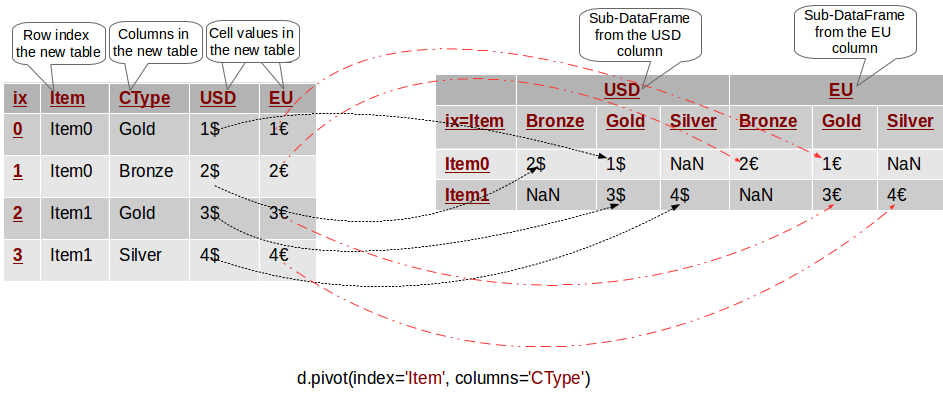

In [38]:
Image('pivoting_simple_multicolumn.png')

# 1. Строковые операции в pandas

Как нам известно, под капотом у pandas - массив numpy, поэтому мы работаем с объектами pandas как с массивами np, у которых индекс не числововй, а стороковый ('label').

In [51]:
data = ['peter', 'Paul', None, 'MARY', 'gUIDO']
[s.capitalize() for s in data]

AttributeError: 'NoneType' object has no attribute 'capitalize'

In [52]:
names = pd.Series(data)
names

0    peter
1     Paul
2     None
3     MARY
4    gUIDO
dtype: object

In [53]:
names.str.capitalize()

0    Peter
1     Paul
2     None
3     Mary
4    Guido
dtype: object

При этом, объект, который None "остается на своем месте" и не приводит к ошибке.

In [54]:
names.str.capitalize().values

array(['Peter', 'Paul', None, 'Mary', 'Guido'], dtype=object)

In [55]:
names.str.len()

0    5.0
1    4.0
2    NaN
3    4.0
4    5.0
dtype: float64

Все ожидаемо - у None нет длины.

In [56]:
names.str.startswith('G')

0    False
1    False
2     None
3    False
4    False
dtype: object

А вот теперь можно было и False вернуть...

In [57]:
names.str.lower().str.split('a')

0    [peter]
1    [p, ul]
2       None
3    [m, ry]
4    [guido]
dtype: object

Также можно спокойно работать с регулярными выражениями:

In [58]:
names.str.extract('([A-Za-z]+)')

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


0    peter
1     Paul
2      NaN
3     MARY
4    gUIDO
dtype: object

Крайне полезная функция get_dummies - http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.get_dummies.html, '|' - разделитель по умолчанию: 

In [59]:
pd.Series(['a|b', 'a', 'a|c']).str.get_dummies()

,a,b,c
0,1,1,0
1,1,0,0
2,1,0,1


На практике это выглядит вот так:

In [63]:
import gzip

with gzip.open('recipeitems-latest.json.gz', 'r') as f:
    data = (line.strip() for line in f)
    data_json = "[{0}]".format(','.join(data))
recipes = pd.read_json(data_json)

In [64]:
recipes.shape

(173278, 17)

In [65]:
recipes.head()

,_id,cookTime,creator,dateModified,datePublished,description,image,ingredients,name,prepTime,recipeCategory,recipeInstructions,recipeYield,source,totalTime,ts,url
0,{u'$oid': u'5160756b96cc62079cc2db15'},PT30M,NaN,NaN,2013-03-11,"Late Saturday afternoon, after Marlboro Man ha...",http://static.thepioneerwoman.com/cooking/file...,Biscuits\n3 cups All-purpose Flour\n2 Tablespo...,Drop Biscuits and Sausage Gravy,PT10M,NaN,NaN,12,thepioneerwoman,NaN,{u'$date': 1365276011104},http://thepioneerwoman.com/cooking/2013/03/dro...
1,{u'$oid': u'5160756d96cc62079cc2db16'},PT20M,NaN,NaN,2013-03-13,"When I was growing up, I participated in my Ep...",http://static.thepioneerwoman.com/cooking/file...,12 whole Dinner Rolls Or Small Sandwich Buns (...,Hot Roast Beef Sandwiches,PT20M,NaN,NaN,12,thepioneerwoman,NaN,{u'$date': 1365276013902},http://thepioneerwoman.com/cooking/2013/03/hot...
2,{u'$oid': u'5160756f96cc6207a37ff777'},NaN,NaN,NaN,2013-01-07,A beauty of a carrot salad - tricked out with ...,http://www.101cookbooks.com/mt-static/images/f...,Dressing:\n1 tablespoon cumin seeds\n1/3 cup /...,Morrocan Carrot and Chickpea Salad,PT15M,NaN,NaN,NaN,101cookbooks,NaN,{u'$date': 1365276015332},http://www.101cookbooks.com/archives/moroccan-...
3,{u'$oid': u'5160757096cc62079cc2db17'},PT15M,NaN,NaN,2013-03-18,It's Monday! It's a brand new week! The birds ...,http://static.thepioneerwoman.com/cooking/file...,Biscuits\n3 cups All-purpose Flour\n2 Tablespo...,Mixed Berry Shortcake,PT15M,NaN,NaN,8,thepioneerwoman,NaN,{u'$date': 1365276016700},http://thepioneerwoman.com/cooking/2013/03/mix...
4,{u'$oid': u'5160757496cc6207a37ff778'},NaN,NaN,NaN,2013-01-20,A simple breakfast bowl made with Greek yogurt...,http://www.101cookbooks.com/mt-static/images/f...,For each bowl: \na big dollop of Greek yogurt\...,Pomegranate Yogurt Bowl,PT5M,NaN,NaN,Serves 1.,101cookbooks,NaN,{u'$date': 1365276020318},http://www.101cookbooks.com/archives/pomegrana...


In [66]:
recipes.ingredients.str.len().describe()

count    173278.000000
mean        244.617926
std         146.705285
min           0.000000
25%         147.000000
50%         221.000000
75%         314.000000
max        9067.000000
Name: ingredients, dtype: float64

In [67]:
recipes.name[np.argmax(recipes.ingredients.str.len())]

/usr/local/lib/python2.7/dist-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


u'Carrot Pineapple Spice &amp; Brownie Layer Cake with Whipped Cream &amp; Cream Cheese Frosting and Marzipan Carrots'

Часто бывает, что нам нужно посчитать число строк, содержащих определенный токен:

In [68]:
recipes.description.str.contains('[Bb]reakfast').sum()

3524

In [69]:
spice_list = ['salt', 'pepper', 'oregano', 'sage', 'parsley',
              'rosemary', 'tarragon', 'thyme', 'paprika', 'cumin']
spice_df = pd.DataFrame(dict((spice, recipes.ingredients.str.contains(spice, re.IGNORECASE))
                             for spice in spice_list))
spice_df.head()

,cumin,oregano,paprika,parsley,pepper,rosemary,sage,salt,tarragon,thyme
0,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,True,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False


In [70]:
spice_df.sum()

cumin        4817
oregano      3468
paprika      3528
parsley      9136
pepper      39435
rosemary     3039
sage         4435
salt        53139
tarragon     1254
thyme        5914
dtype: int64

# 2. Работа с временными данными

На прошлом занятии мы рассмотрели основные операции с DateTime index, а также упомянули, что pandas вообще задумывался как пакет для работы с временными рядами.

In [72]:
data = pd.read_csv('ts_data.csv', 
                    parse_dates={'Timestamp': ['Date', 'Time']},
                    index_col='Timestamp')

In [73]:
ticks = data.ix[:, ['Price', 'Volume']]
ticks.head()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,Price,Volume
Timestamp,,
2011-11-01 08:04:56.364,104.55,100
2011-11-01 08:53:07.459,104.43,150
2011-11-01 08:53:09.284,104.43,100
2011-11-01 08:54:03.921,104.50,100
2011-11-01 08:58:06.162,104.46,1000


Также мы упомянули resample, который позволяет получить значения, соответствующие иным временным интервалам, нежели были первоначально представлены в данных:

In [74]:
bars = ticks.Price.resample('1min', how='ohlc')
bars.describe()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).ohlc()
  """Entry point for launching an IPython kernel.


,open,high,low,close
count,1104.000000,1104.000000,1104.000000,1104.000000
mean,104.070805,104.079931,104.062033,104.071086
std,0.185355,0.187170,0.184889,0.186628
min,103.300800,103.300800,103.300800,103.300800
25%,103.915150,103.923250,103.909975,103.910000
50%,104.040000,104.050000,104.030000,104.040000
75%,104.230000,104.240000,104.220000,104.230000
max,104.570000,104.580000,104.550000,104.570000


In [75]:
minute_range = bars.high - bars.low
minute_range.describe()

count    1104.000000
mean        0.017898
std         0.018568
min         0.000000
25%         0.000875
50%         0.013900
75%         0.029000
max         0.150000
dtype: float64

In [76]:
minute_return = bars.close / bars.open - 1
minute_return.describe()

count    1104.000000
mean        0.000003
std         0.000191
min        -0.001442
25%        -0.000096
50%         0.000000
75%         0.000096
max         0.000962
dtype: float64

Помимо известного нам способа индексации:

In [77]:
bars.ix['2011-11-01 09:27':'2011-11-01 09:32']

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,open,high,low,close
Timestamp,,,,
2011-11-01 09:27:00,NaN,NaN,NaN,NaN
2011-11-01 09:28:00,104.1700,104.1700,104.1700,104.1700
2011-11-01 09:29:00,103.3008,103.3008,103.3008,103.3008
2011-11-01 09:30:00,104.2300,104.2700,104.2200,104.2500
2011-11-01 09:31:00,104.2600,104.2600,104.2200,104.2400
2011-11-01 09:32:00,104.2100,104.2100,104.2100,104.2100


Также можно пользоваться методом at_time:

In [78]:
bars.open.at_time('9:30')

Timestamp
2011-11-01 09:30:00    104.23
2011-11-02 09:30:00    103.90
2011-11-03 09:30:00    103.80
Freq: 1440T, Name: open, dtype: float64

In [79]:
bars.close.at_time('9:30')

Timestamp
2011-11-01 09:30:00    104.25
2011-11-02 09:30:00    103.89
2011-11-03 09:30:00    103.80
Freq: 1440T, Name: close, dtype: float64

In [80]:
bars.between_time('10:00', '16:00').head()

,open,high,low,close
Timestamp,,,,
2011-11-01 10:00:00,104.17,104.31,104.17,104.2000
2011-11-01 10:01:00,104.19,104.23,104.16,104.1784
2011-11-01 10:02:00,104.18,104.19,104.15,104.1700
2011-11-01 10:03:00,104.15,104.18,104.15,104.1600
2011-11-01 10:04:00,104.16,104.16,104.09,104.0900


Часто бывает удобно сдвинуть на один момент времени:

In [81]:
ticks.head()

,Price,Volume
Timestamp,,
2011-11-01 08:04:56.364,104.55,100
2011-11-01 08:53:07.459,104.43,150
2011-11-01 08:53:09.284,104.43,100
2011-11-01 08:54:03.921,104.50,100
2011-11-01 08:58:06.162,104.46,1000


In [82]:
ticks.shift(1).head()

,Price,Volume
Timestamp,,
2011-11-01 08:04:56.364,NaN,NaN
2011-11-01 08:53:07.459,104.55,100.0
2011-11-01 08:53:09.284,104.43,150.0
2011-11-01 08:54:03.921,104.43,100.0
2011-11-01 08:58:06.162,104.50,100.0


Как вы уже догадались, если мы захотим сгруппировать наблюдения по дате, то будем использовать groupby():

In [83]:
ticks.groupby(level=0).count().head()

,Price,Volume
Timestamp,,
2011-11-01 08:04:56.364,1,1
2011-11-01 08:53:07.459,1,1
2011-11-01 08:53:09.284,1,1
2011-11-01 08:54:03.921,1,1
2011-11-01 08:58:06.162,3,3


Для того, чтобы вывести статистику по иному временному периоду (скажем, из дня получить год), нужно пользоваться resample:

In [84]:
ticks.Price.resample('d', how='mean')

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  """Entry point for launching an IPython kernel.


Timestamp
2011-11-01    104.209203
2011-11-02    104.126744
2011-11-03    103.882160
Freq: D, Name: Price, dtype: float64

Визуализацию рассмотрим несколько позднее.

# 3. Just another "typical" ML pipeline

"Обычно" задача машинного оубчения решается так:

* подготовка и "зачистка" данных - как раз здесь pandas незаменим;
* обучение модели - sklearn (вы ведь не собираетесь реализовывать ничего сами ? оО);
* красивая "упаковка" результата (если требуется) - опять же pandas, matplotlib, seaborn ...

Наиболее часто используется - groupby(), apply(), fillna(). Что касается работы с пропущенными значениями - выбрасывать или заполнять - данный вопрос следует решать исследователю индивидуально.

In [85]:
data = pd.read_csv('loan.csv.gz', compression='gzip')

/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [86]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Не забывайте менять текстовые поля: 'n/a'm 'NULL' на их действительную сущность - np.nan.

In [87]:
data.replace('n/a', np.nan,inplace=True)

In [88]:
data.isnull().sum().head()

id                 0
member_id          0
loan_amnt          0
funded_amnt        0
funded_amnt_inv    0
dtype: int64

Обычно для данных с врменным показателями бывает интересно посмотреть на распределение во времени:

In [89]:
import datetime
pd.value_counts(data['earliest_cr_line'].dropna().\
                apply(lambda x: datetime.datetime.strptime(str(x), '%b-%Y'))).\
sort_index().tail()

2012-07-01    145
2012-08-01    147
2012-09-01    105
2012-10-01     45
2012-11-01     11
Name: earliest_cr_line, dtype: int64

Если хотите избежать "плясок с бубном" из-за np.nan и прочего, пытайтесь найти готовый аналог в pandas (докуменатация!).

In [90]:
data.earliest_cr_line = pd.to_datetime(data.earliest_cr_line)

In [91]:
data['earliest_cr_line_year'] = data['earliest_cr_line'].apply(lambda x: x.year)

In [92]:
data['earliest_cr_line_year'].value_counts().sort_index(ascending=False).head()

2012.0     2001
2011.0     6324
2010.0     8167
2009.0     9548
2008.0    16229
Name: earliest_cr_line_year, dtype: int64

Для категорий обычно стараюсь смотреть распределение целевой переменной, для этого удобно использовать знакомые нам groupby(), aggregate() итд.

In [93]:
data.groupby('grade').agg([np.mean])['loan_amnt']

,mean
grade,
A,14038.860306
B,13642.965211
C,14466.306028
D,15459.506278
E,17998.146171
F,19139.160809
G,20538.563491


Насчет кодирования исходных переменных - опции обычно 2: либо сделать one-hot прямо в pandas, либо передать как словарь в sklearn, где использовать векторизатор.

In [94]:
pd.get_dummies(data['grade']).head()

,A,B,C,D,E,F,G
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0


Также неплохой инструмент - pd.crosstab.

In [95]:
pd.crosstab(data["grade"],data["term"],margins=True)


term,36 months,60 months,All
grade,,,
A,143015,5187,148202
B,212009,42526,254535
C,162420,83440,245860
D,76687,62855,139542
E,21842,48863,70705
F,4466,18580,23046
G,686,4803,5489
All,621125,266254,887379


# Дополнительный материал 1. Eval/query

http://pandas.pydata.org/pandas-docs/stable/generated/pandas.eval.html

Ускоряет выполнение арифметических операций за счет использования numexpr.

In [96]:
nrows, ncols = 100000, 100
df1, df2, df3, df4 = (pd.DataFrame(np.random.rand(nrows, ncols))
                      for i in range(4))

In [97]:
%timeit df1 + df2 + df3 + df4

10 loops, best of 3: 44.3 ms per loop


In [98]:
%timeit pd.eval('df1 + df2 + df3 + df4')


10 loops, best of 3: 46 ms per loop


In [99]:
np.allclose(df1 + df2 + df3 + df4,
            pd.eval('df1 + df2 + df3 + df4'))

True

Список операций, которые поддерживает numexpr - https://github.com/pydata/numexpr .

Как следствие, pd.eval поддерживает:
* математические функции (sin, power итд);
* арифметические операции (кроме побитовых);
* булево индексирование;
* индексация по столбцу/строке.

In [100]:
df = pd.DataFrame(np.random.rand(1000, 3), columns=['A', 'B', 'C'])

In [101]:
pd.eval("(df.A + df.B) / (df.C - 1)").head()

0   -19.902765
1    -1.273850
2    -7.800130
3    -2.088789
4    -2.344202
dtype: float64

In [102]:
df.eval('(A + B) / (C - 1)').head()

0   -19.902765
1    -1.273850
2    -7.800130
3    -2.088789
4    -2.344202
dtype: float64

Query - выбор элементов, отвечающих заданному условию с помощью eval():

In [103]:
df.query('A < 0.5 and B < 0.5').head()

,A,B,C
1,0.222425,0.181071,0.683247
10,0.126141,0.398237,0.382976
12,0.477561,0.065663,0.820453
14,0.125909,0.189451,0.916439
20,0.054085,0.269961,0.147820


# Дополнительный материал 2. Use BASH.

Зачастую бывает нужен "быстрый" ответ на вопрос, связанный с качеством данных. Например, вам предоставили выборку клиентов, по которым нужно построить предиктивную модель. Как совсем быстро ответить - "id неуникальные, переделайте"? Бывает, что загружать данные в pandas долго, да и избыточно для такой тривиальной задачи.

In [104]:
! ls -lah

итого 130M
drwxrwxrwx 1 root root 4,0K июн 26 20:28 .
drwxrwxrwx 1 root root 8,0K июн 26 20:28 ..
-rwxrwxrwx 1 root root 447K июн 26 20:28 1. Pandas - missing topics.ipynb
-rwxrwxrwx 1 root root  59K окт  6  2017 groupby.jpg
drwxrwxrwx 1 root root    0 июн 26 20:26 .ipynb_checkpoints
-rwxrwxrwx 1 root root  99M окт  6  2017 loan.csv.gz
-rwxrwxrwx 1 root root  39K окт  6  2017 pivoting_simple1.png
-rwxrwxrwx 1 root root  55K окт  6  2017 pivoting_simple_multicolumn.png
-rwxrwxrwx 1 root root  30M окт  6  2017 recipeitems-latest.json.gz
-rwxrwxrwx 1 root root  50K окт  6  2017 stack-unstack1.png
-rwxrwxrwx 1 root root 805K окт  6  2017 ts_data.csv


Гистограмма ключей:

In [105]:
!cut -d$',' -f1 ts_data.csv | sort -n| uniq -c

cut: разделитель должен быть одним символом
По команде «cut --help» можно получить дополнительную информацию.


Посчитать ключи:

In [106]:
!cut -d$',' -f1 ts_data.csv | sort -n| wc -l

cut: разделитель должен быть одним символом
По команде «cut --help» можно получить дополнительную информацию.
0


Бывает, что нужно знать распределение длины строк:

In [108]:
! awk '{print length}' recipeitems-latest.json.gz | sort | uniq -c

      1 8


Ну и совсем банальное: "Нет ли строк дубликатов?"

In [109]:
! sort ts_data.csv | uniq -u | wc -l

14633
